In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.optimize import minimize

#sns.set(context="talk")
plt.xkcd()

In [2]:
df = pd.read_csv("ex1data2.txt", names=['Size', 'Bedrooms', 'Price'])
df.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


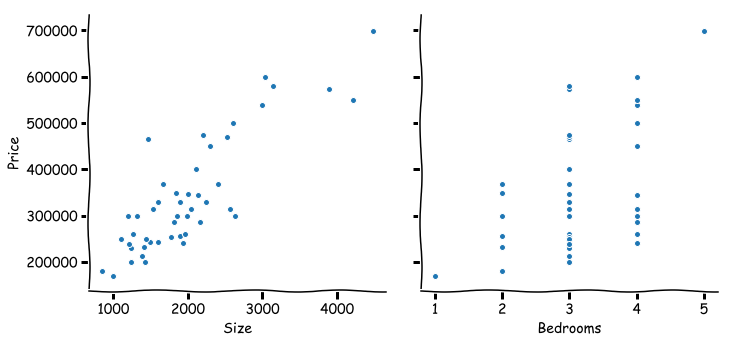

In [3]:
sns.pairplot(df,
             x_vars=["Size", "Bedrooms"],
             y_vars=["Price"],
             size=5, # Height in inch
             aspect=1)  # Ratio of width to height)
plt.show()

#### Define hypothesis and cost function

In [4]:
# Linear regression function
def hypo(theta, X):
    h = X.dot(theta)
    return h.reshape((-1, 1))

# Cost and gradient function
def cost(theta, X, y, lamb=0):
    m = len(y)
    h = hypo(theta, X)
    reg = lamb/(2*m) * np.sum(theta[1:]**2)
    cost = 1/(2*m) * np.sum((h-y)**2) + reg
    grad = 1/m * (h - y).T.dot(X).T
    reg_grad = lamb/m * theta[1:]
    grad[1:, 0] = grad[1:, 0] + reg_grad
    return cost, grad.ravel()

# Normalization
def norm(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return (X - mu) / sigma, mu, sigma

X = df.values[:, 0:len(df.columns)-1]
X, mu, sigma = norm(X) # Normalization
y = df.values[:, len(df.columns)-1:len(df.columns)]
X = np.concatenate((np.ones([len(y), 1]), X), axis=1)
theta = np.zeros([X.shape[1]])

#### Minimize cost function and find learned parameters theta

In [5]:
lamb = 0
res = minimize(cost, theta, args=(X, y, lamb), jac=True)
print(res)

      fun: 2043280050.602828
 hess_inv: array([[  1.00153663e+00,   9.39775100e-04,   3.66482648e-03],
       [  9.39775100e-04,   1.45732281e+00,  -8.12988708e-01],
       [  3.66482648e-03,  -8.12988708e-01,   1.45998423e+00]])
      jac: array([  8.62160727e-08,   9.68928439e-08,   9.05627608e-08])
  message: 'Optimization terminated successfully.'
     nfev: 19
      nit: 10
     njev: 19
   status: 0
  success: True
        x: array([ 340412.65957455,  109447.79646971,   -6578.35485411])


#### Predict values

In [6]:
# Predicted price of a 1650 sq-ft, 3 br house
x_predict = (np.array([1650, 3])-mu)/sigma
x_predict = np.concatenate((np.ones([1]), x_predict))
y_predict = hypo(res.x, x_predict).ravel()[0]
print("For a 1650 sq-ft, 3 br house, we predict a price of {0:.2f}".format(y_predict))

For a 1650 sq-ft, 3 br house, we predict a price of 293081.46
